##**Zomato Analysis**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [13]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Zomato _data .csv',encoding='latin-1')

In [14]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [16]:
def rate(value):
  if value=='NEW' or value=='-':
    return np.nan
  else:
    value=str(value).split('/')[0]
    return float(value)

df['rate']=df['rate'].apply(rate)
print(df.head())
print(df.info())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148

###**bold text** **1. What type of restaurant do the majority of customers order from?**

In [38]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0, 0.5, 'Customers order')

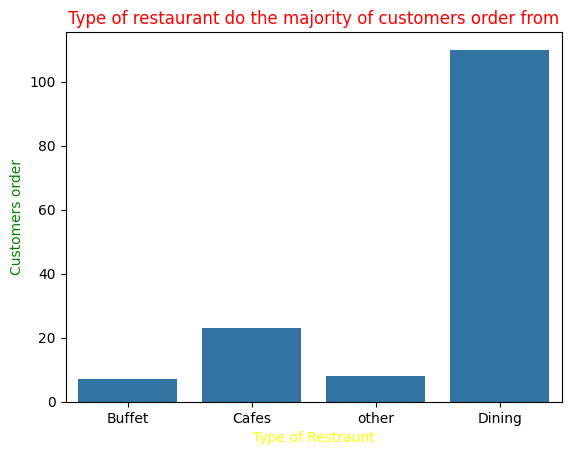

In [31]:
sns.countplot(x=df['listed_in(type)'])
plt.title("Type of restaurant do the majority of customers order from",c="red")
plt.xlabel("Type of Restraunt",c="yellow")
plt.ylabel("Customers order",c="green")

Text(0, 0.5, 'Customers order')

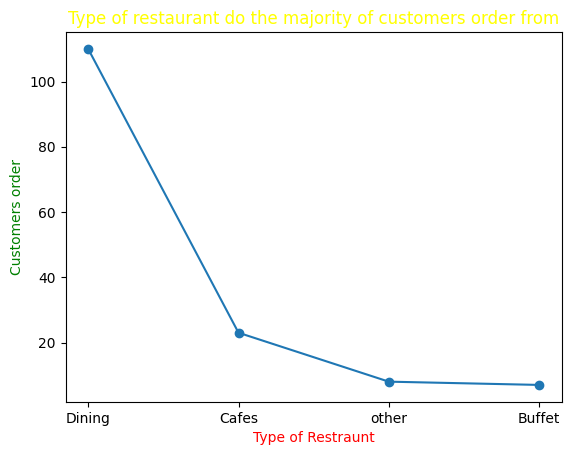

In [30]:
plt.plot(df['listed_in(type)'].value_counts(), marker='o')
plt.title("Type of restaurant do the majority of customers order from",c="yellow")
plt.xlabel("Type of Restraunt",c="red")
plt.ylabel("Customers order",c="green")


Majority of customers falls under Dining

###2. How many votes has each type of restaurant received from customers?

In [37]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0, 0.5, 'No. of Votes')

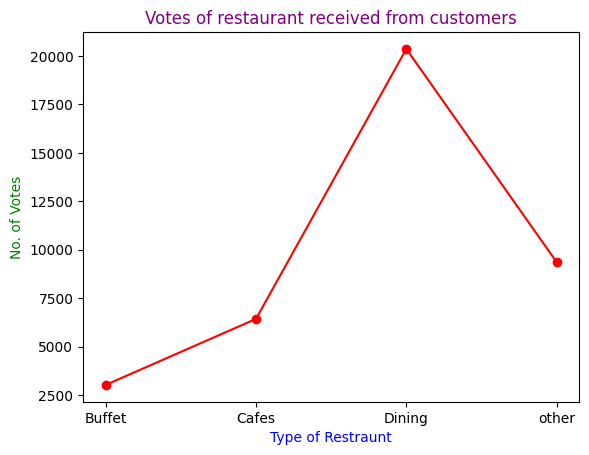

In [34]:
r=df.groupby('listed_in(type)')['votes'].sum()
finalr=pd.DataFrame({'votes':r})
plt.plot(finalr, c="Red",marker="o")
plt.title("Votes of restaurant received from customers",c="purple")
plt.xlabel("Type of Restraunt",c="blue")
plt.ylabel("No. of Votes",c="green")

Dining has received max votes

##3. What are the ratings that the majority of restaurants have received?

In [39]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


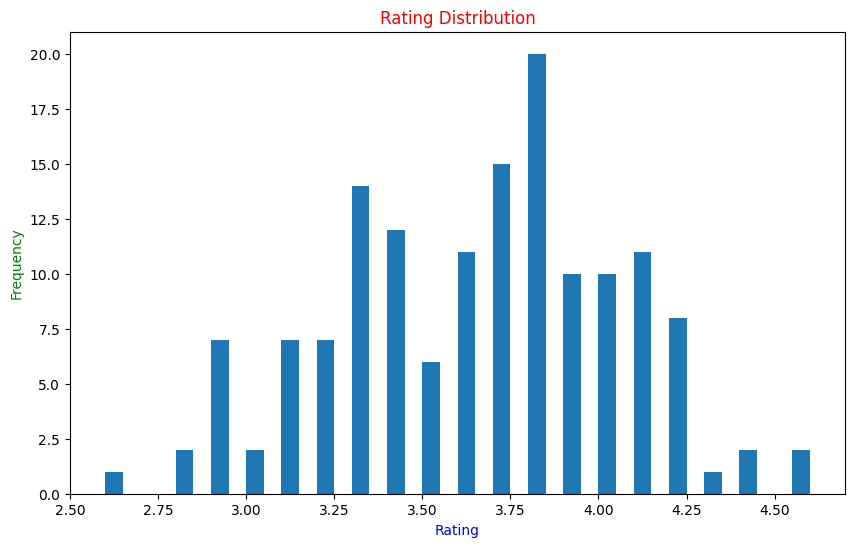

In [66]:
plt.figure(figsize=(10,6))
plt.hist(df['rate'],bins=40)
plt.title("Rating Distribution", c="red")
plt.xlabel("Rating", c="blue")
plt.ylabel("Frequency", c="green")
plt.show()

20 Restraunts has received max of 3.8 rating

###3. Zomato has observed that most couples order most of their food online. What is their average spending on each order?

In [54]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 1.0, 'Avg spending in each order')

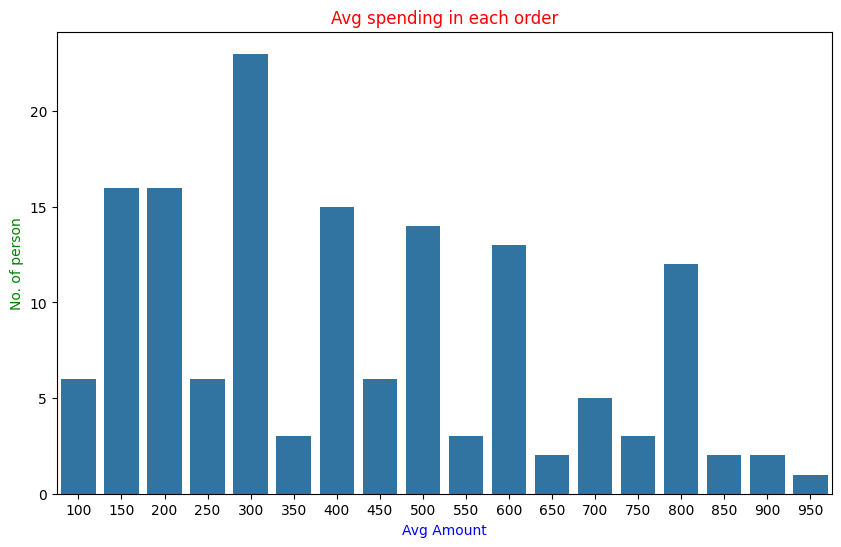

In [65]:
plt.figure(figsize=(10,6))
avg_spend= df['approx_cost(for two people)']
sns.countplot(x=avg_spend)
plt.xlabel("Avg Amount", c="blue")
plt.ylabel("No. of person", c="green")
plt.title("Avg spending in each order", c="red")

Avg spending on each order is 300rs

###5. Which mode (online or offline) has received the maximum rating?

In [62]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 1.0, 'Offline vs Online')

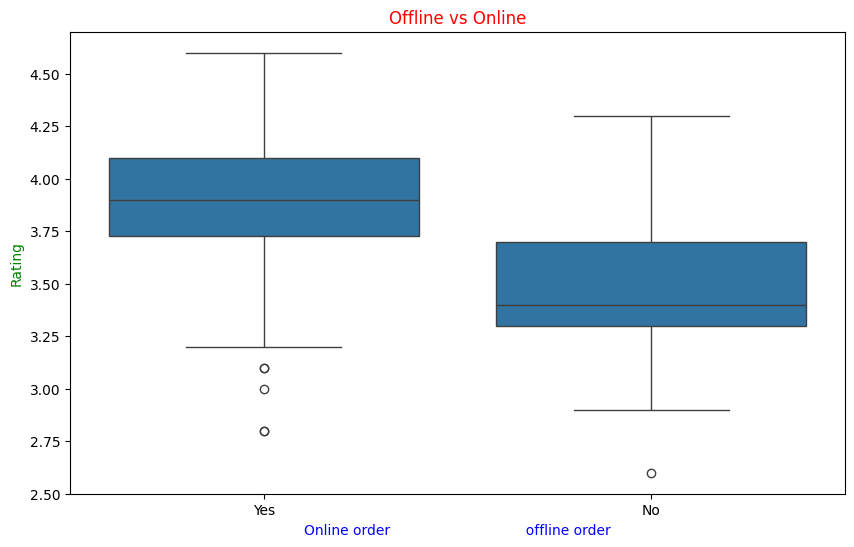

In [71]:
plt.figure(figsize=(10,6))
sns.boxplot(x="online_order", y='rate',data=df)
plt.xlabel("Online order                               offline order", c="blue")
plt.ylabel("Rating", c="green")
plt.title("Offline vs Online", c="red")

Online has Received max rating

###6. Which type of restaurant received more offline orders, so that Zomato can provide those customers with some good offers?


In [72]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [73]:
x=df.pivot_table(index='listed_in(type)',columns='online_order',values='rate',aggfunc='count')
x

online_order,No,Yes
listed_in(type),,
Buffet,3,4
Cafes,8,15
Dining,77,33
other,2,6


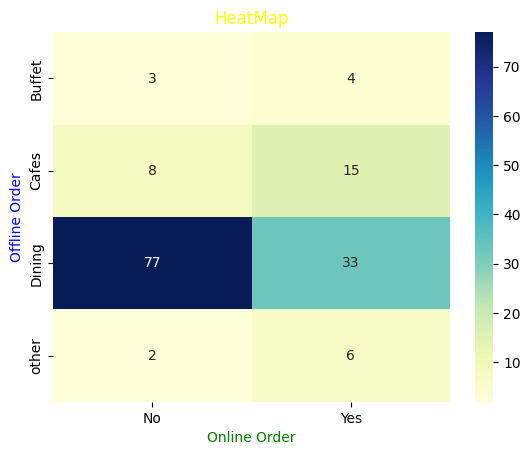

In [76]:
x=df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(x,annot=True,cmap='YlGnBu',fmt='g')
plt.title('HeatMap', c="yellow")
plt.xlabel('Online Order',c="green")
plt.ylabel('Offline Order',c="blue")
plt.show()

77 customers wanna dining offline and 33 wanna Dining online